# EMPLOYEE ATTRITION CONTROL

### CASE STUDY
The project is to help a company which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee;
-Satisfaction Level
-Last evaluation
-Number of projects
-Average monthly hours
-Time spent at the company
-Whether they have had a work accident
-Whether they have had a promotion in the last 5 years
-Departments (column sales)
-Salary

Use your analytics skills to answer the following questions :
1. What type of employees are leaving?
2. Which employees are prone to leave next.
3. Recommendations

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [13]:
current_employees = pd.read_excel(r"C:\Users\SOLA\Downloads\Employee attrition.xlsx", "Existing employees")
ex_employees = pd.read_excel(r"C:\Users\SOLA\Downloads\Employee attrition.xlsx", "Employees who have left")

In [14]:
current_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [15]:
ex_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [16]:
current_employees['attrition'] = 0

In [17]:
ex_employees['attrition'] = 1

In [18]:
employees['attrition'].value_counts(normalize = True)

0    0.761917
1    0.238083
Name: attrition, dtype: float64

In [19]:
employees = pd.merge(current_employees,ex_employees, how='outer')

In [20]:
employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [21]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  attrition              14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [22]:
employees.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'attrition'],
      dtype='object')

In [23]:
employees.rename({'satisfaction_level':'satisfaction', 'last_evaluation':'evaluation', 'number_project':'project',
       'average_montly_hours':'hours', 'time_spend_company':'tenure', 'Work_accident':'accident',
       'promotion_last_5years':'promotion'}, axis= 1, inplace= True)

ex_employees.rename({'satisfaction_level':'satisfaction', 'last_evaluation':'evaluation', 'number_project':'project',
       'average_montly_hours':'hours', 'time_spend_company':'tenure', 'Work_accident':'accident',
       'promotion_last_5years':'promotion'}, axis= 1, inplace= True)

current_employees.rename({'satisfaction_level':'satisfaction', 'last_evaluation':'evaluation', 'number_project':'project',
       'average_montly_hours':'hours', 'time_spend_company':'tenure', 'Work_accident':'accident',
       'promotion_last_5years':'promotion'}, axis= 1, inplace= True)

In [24]:
employees.head(2)

,Emp ID,satisfaction,evaluation,project,hours,tenure,accident,promotion,dept,salary,attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0


In [25]:
employees.drop(['Emp ID'], axis = 1, inplace = True)

In [26]:
ex_employees.drop(['Emp ID'], axis = 1, inplace = True)

current_employees.drop(['Emp ID'], axis = 1, inplace = True)

In [27]:
employees.head(2)

,satisfaction,evaluation,project,hours,tenure,accident,promotion,dept,salary,attrition
0,0.58,0.74,4,215,3,0,0,sales,low,0
1,0.82,0.67,2,202,3,0,0,sales,low,0


In [28]:
ex_employees.head(2)

,satisfaction,evaluation,project,hours,tenure,accident,promotion,dept,salary,attrition
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1


In [29]:
current_employees.head(2)

,satisfaction,evaluation,project,hours,tenure,accident,promotion,dept,salary,attrition
0,0.58,0.74,4,215,3,0,0,sales,low,0
1,0.82,0.67,2,202,3,0,0,sales,low,0


In [30]:
employees.describe()

,satisfaction,evaluation,project,hours,tenure,accident,promotion,attrition
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<Axes: xlabel='dept', ylabel='count'>

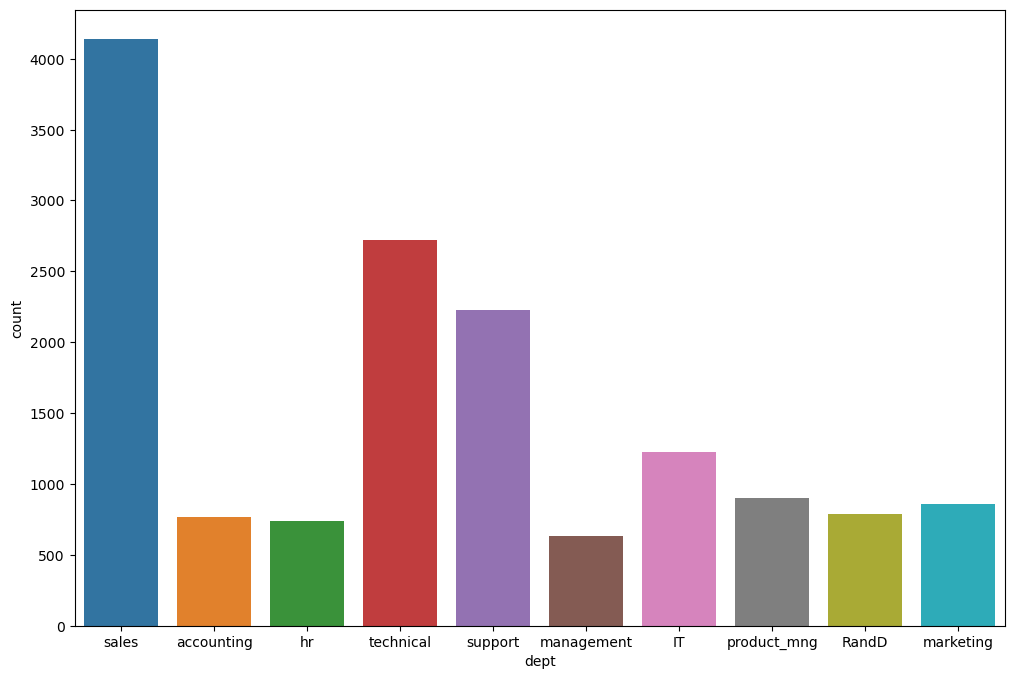

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x='dept', data = employees)

In [32]:
employees['dept'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

<Axes: xlabel='dept', ylabel='count'>

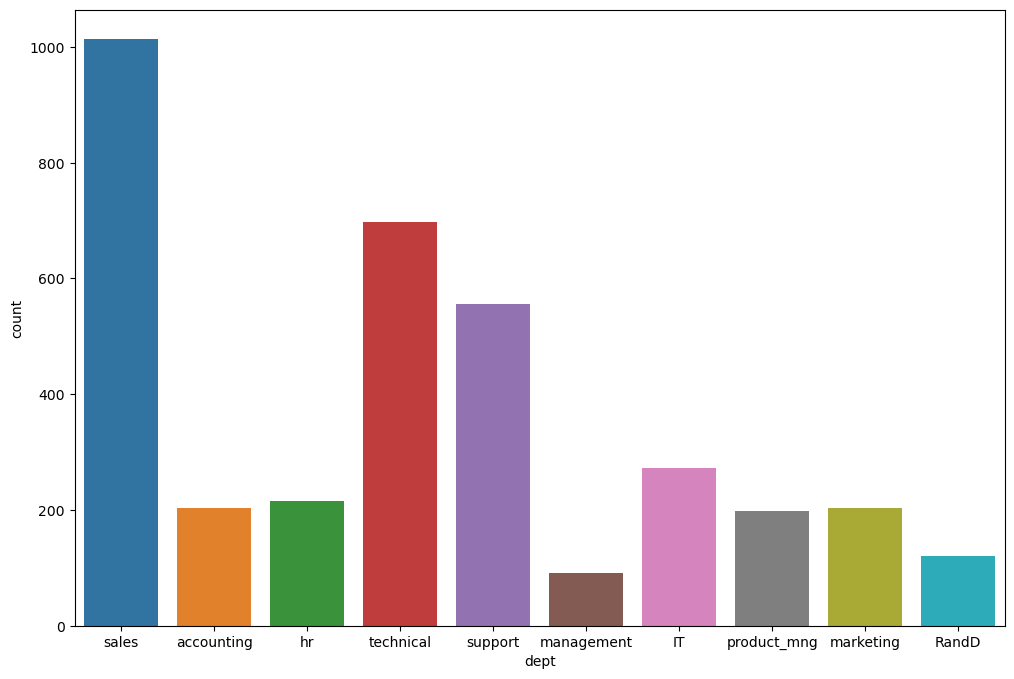

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(x='dept', data = ex_employees)

In [34]:
ex_employees['dept'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64

<Axes: xlabel='dept', ylabel='count'>

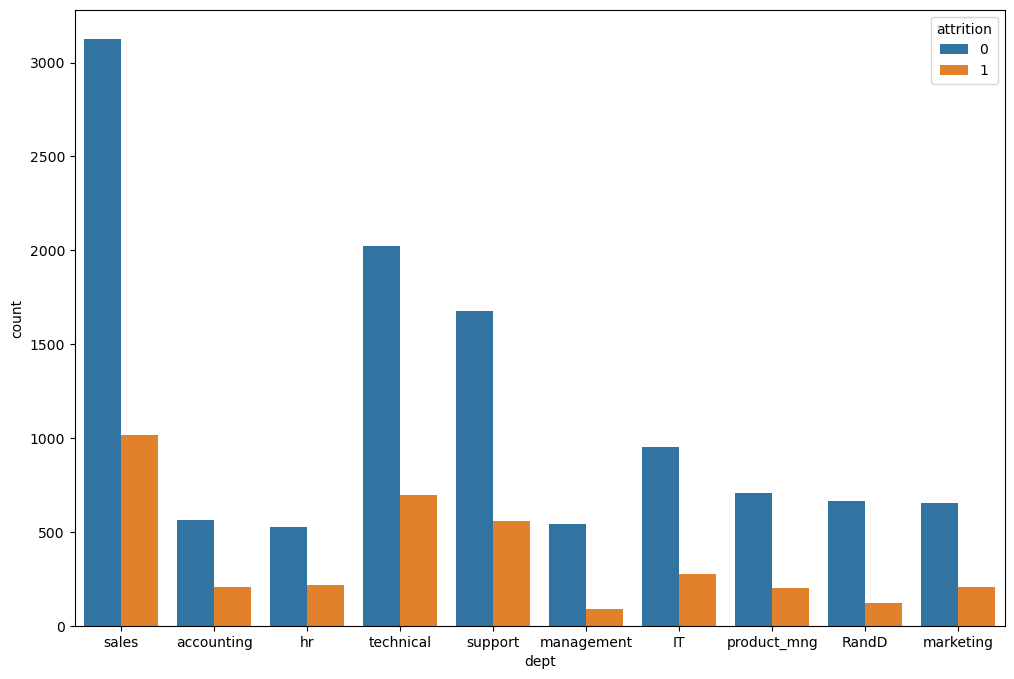

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x='dept', hue = 'attrition', data = employees)

In [36]:
employees['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [86]:
employees['project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: project, dtype: int64

<Axes: xlabel='project', ylabel='count'>

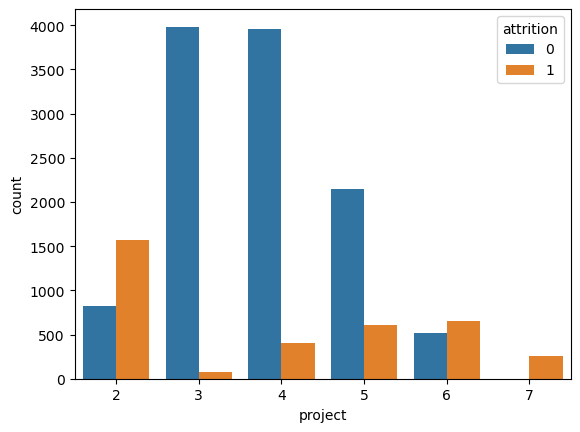

In [87]:
sns.countplot(x = 'project', hue = 'attrition', data = employees)

In [88]:
employees.groupby('project')['attrition'].value_counts()

project  attrition
2        1            1567
         0             821
3        0            3983
         1              72
4        0            3956
         1             409
5        0            2149
         1             612
6        1             655
         0             519
7        1             256
Name: attrition, dtype: int64

In [89]:
employees['tenure'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: tenure, dtype: int64

<Axes: xlabel='tenure', ylabel='count'>

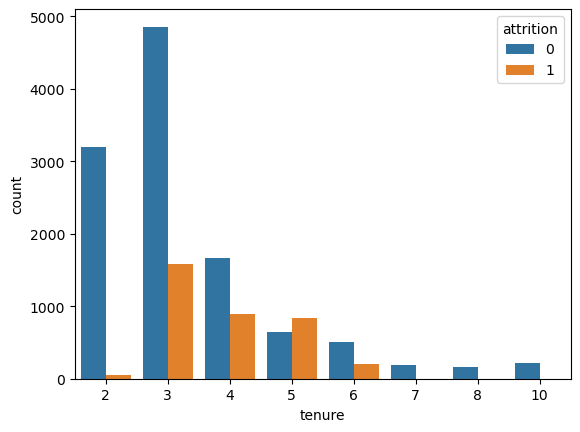

In [90]:
sns.countplot(x = 'tenure', hue = 'attrition', data = employees)

In [91]:
employees.groupby('tenure')['attrition'].value_counts()

tenure  attrition
2       0            3191
        1              53
3       0            4857
        1            1586
4       0            1667
        1             890
5       1             833
        0             640
6       0             509
        1             209
7       0             188
8       0             162
10      0             214
Name: attrition, dtype: int64

In [92]:
employees['hours'].value_counts()

156    153
135    153
149    148
151    147
160    136
      ... 
297      7
96       6
288      6
299      6
303      6
Name: hours, Length: 215, dtype: int64

In [95]:
employees.groupby('hours')['attrition'].value_counts()

hours  attrition
96     0             6
97     0            14
98     0            23
99     0            11
100    0            19
                    ..
306    1            18
307    1            14
308    1            20
309    1            16
310    1            18
Name: attrition, Length: 356, dtype: int64

In [96]:
employees['evaluation'].value_counts()

0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: evaluation, Length: 65, dtype: int64

In [37]:
ex_employees['salary'].value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [38]:
employees.groupby('dept')['attrition'].value_counts()

dept         attrition
IT           0             954
             1             273
RandD        0             666
             1             121
accounting   0             563
             1             204
hr           0             524
             1             215
management   0             539
             1              91
marketing    0             655
             1             203
product_mng  0             704
             1             198
sales        0            3126
             1            1014
support      0            1674
             1             555
technical    0            2023
             1             697
Name: attrition, dtype: int64

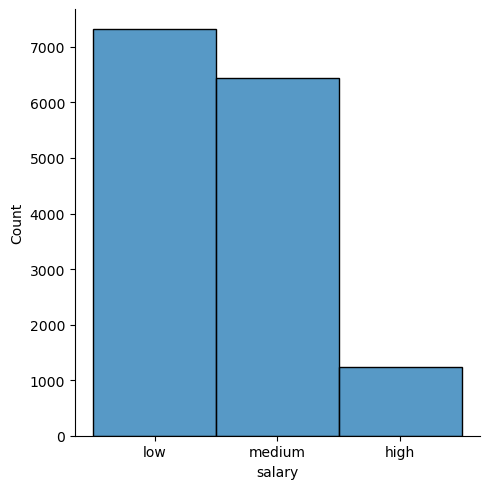

In [39]:
sns.displot(x= 'salary', data = employees)

In [40]:
employees[employees ['salary'] == 'low']

,satisfaction,evaluation,project,hours,tenure,accident,promotion,dept,salary,attrition
0,0.58,0.74,4,215,3,0,0,sales,low,0
1,0.82,0.67,2,202,3,0,0,sales,low,0
2,0.45,0.69,5,193,3,0,0,sales,low,0
3,0.78,0.82,5,247,3,0,0,sales,low,0
4,0.49,0.60,3,214,2,0,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [41]:
lowsalary = employees[employees ['salary'] == 'low']

<Axes: xlabel='salary', ylabel='count'>

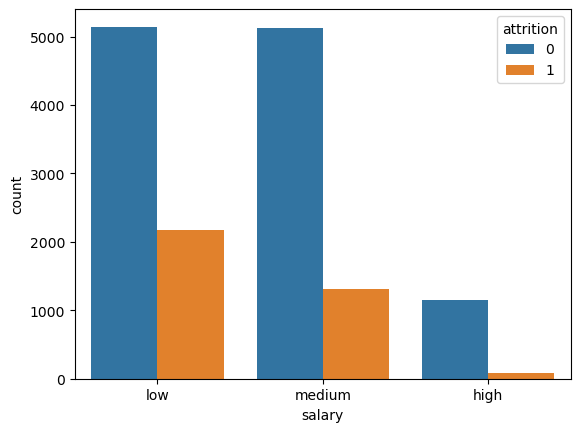

In [42]:
sns.countplot(x = 'salary', hue = 'attrition', data = employees)

<Axes: xlabel='salary', ylabel='attrition'>

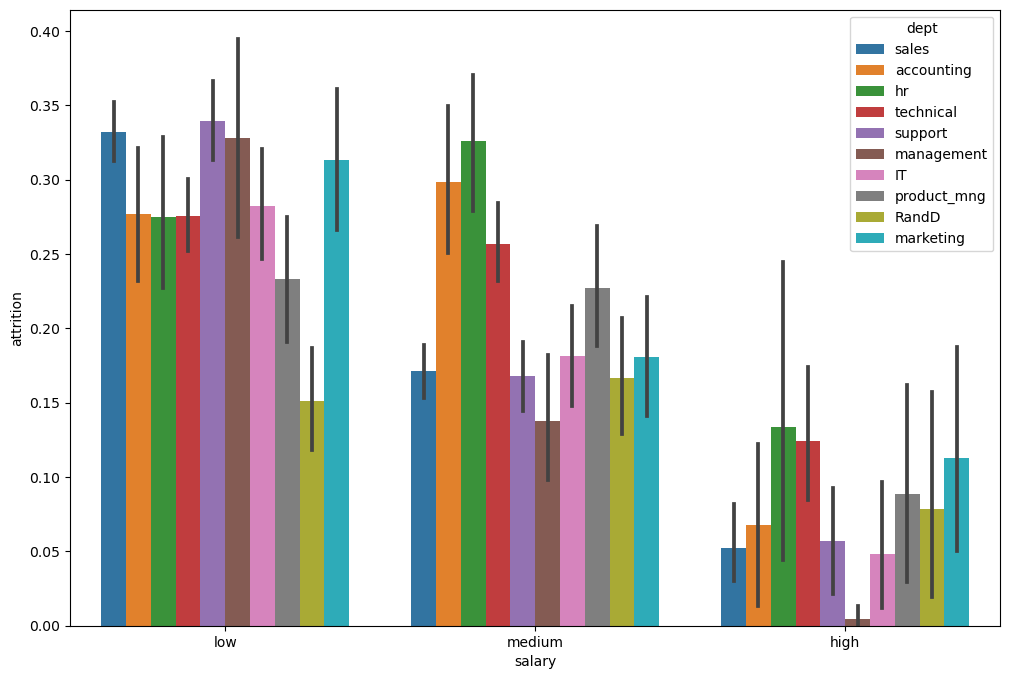

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x='salary', y = 'attrition', hue = 'dept', data = employees)

<Axes: xlabel='dept', ylabel='attrition'>

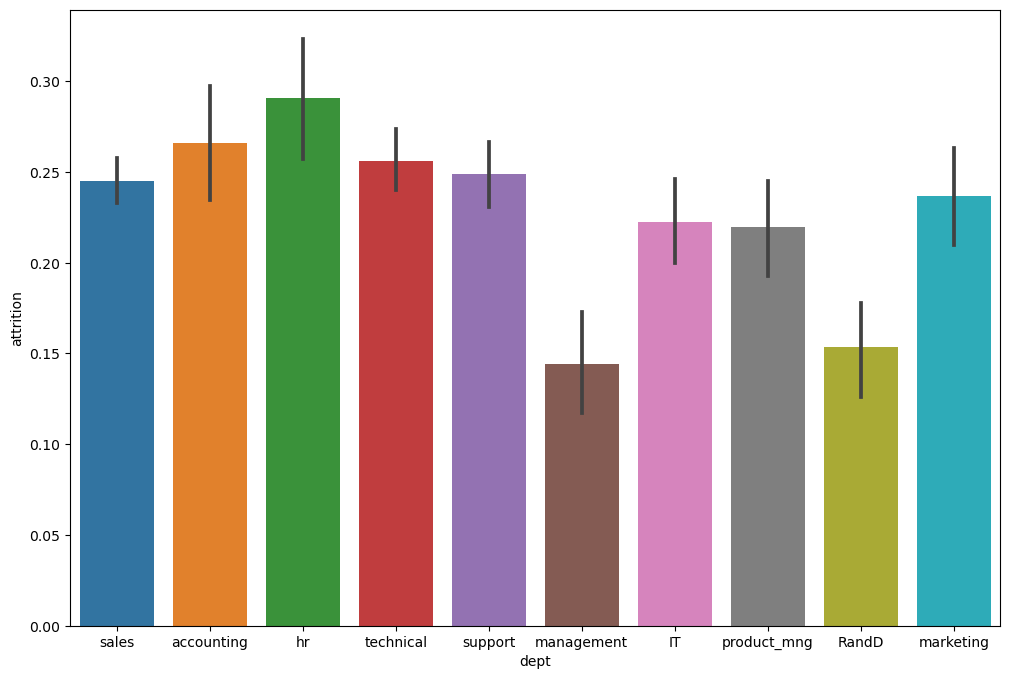

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(x='dept', y = 'attrition', data = employees)

In [45]:
employees.corr()

,satisfaction,evaluation,project,hours,tenure,accident,promotion,attrition
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
tenure,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
attrition,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


<Axes: >

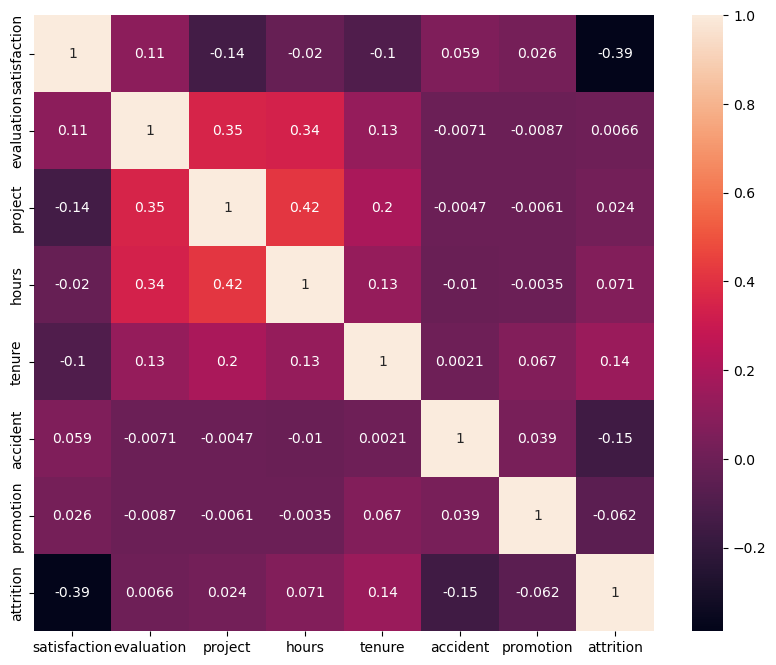

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(employees.corr(), annot= True)

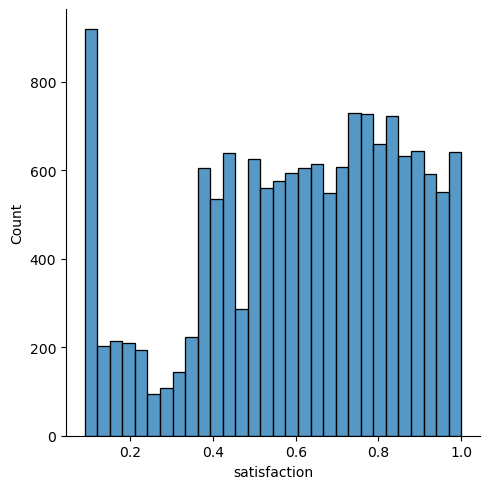

In [47]:
sns.displot(x='satisfaction', data = employees)

In [48]:
employees[employees ['satisfaction'] <= 0.3]

,satisfaction,evaluation,project,hours,tenure,accident,promotion,dept,salary,attrition
24,0.24,0.82,5,179,6,0,0,technical,medium,0
36,0.19,0.53,6,191,4,0,0,support,low,0
65,0.15,0.97,3,198,5,0,0,management,medium,0
83,0.25,0.65,5,220,3,0,0,sales,low,0
86,0.12,0.87,4,244,5,0,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...
14972,0.11,0.97,6,310,4,0,0,accounting,medium,1
14975,0.10,0.79,7,310,4,0,0,hr,medium,1
14979,0.09,0.93,6,296,4,0,0,technical,medium,1
14991,0.09,0.81,6,257,4,0,0,support,low,1


In [49]:
satisfaction_level = employees[employees ['satisfaction'] <= 0.3]

In [50]:
satisfaction_level.head()

,satisfaction,evaluation,project,hours,tenure,accident,promotion,dept,salary,attrition
24,0.24,0.82,5,179,6,0,0,technical,medium,0
36,0.19,0.53,6,191,4,0,0,support,low,0
65,0.15,0.97,3,198,5,0,0,management,medium,0
83,0.25,0.65,5,220,3,0,0,sales,low,0
86,0.12,0.87,4,244,5,0,0,sales,low,0


<Axes: xlabel='salary', ylabel='satisfaction'>

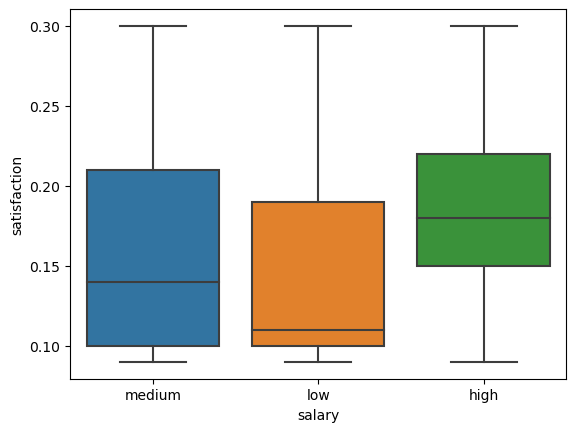

In [51]:
sns.boxplot(x = 'salary', y = 'satisfaction', data = satisfaction_level)

<Axes: xlabel='dept', ylabel='satisfaction'>

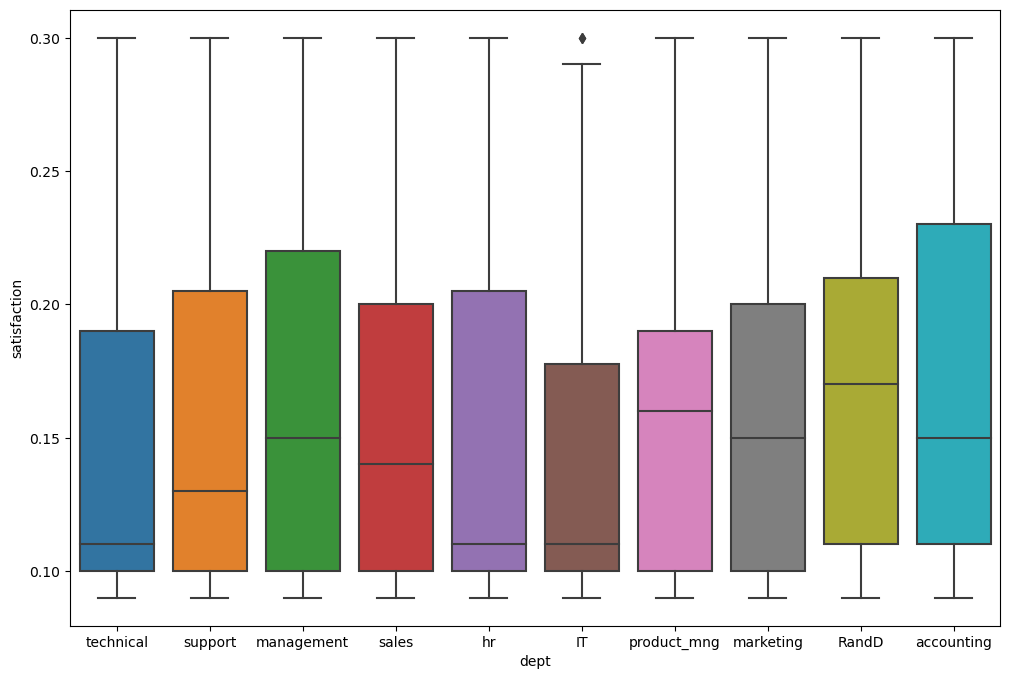

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'dept', y = 'satisfaction', data = satisfaction_level)

<Axes: xlabel='dept', ylabel='satisfaction'>

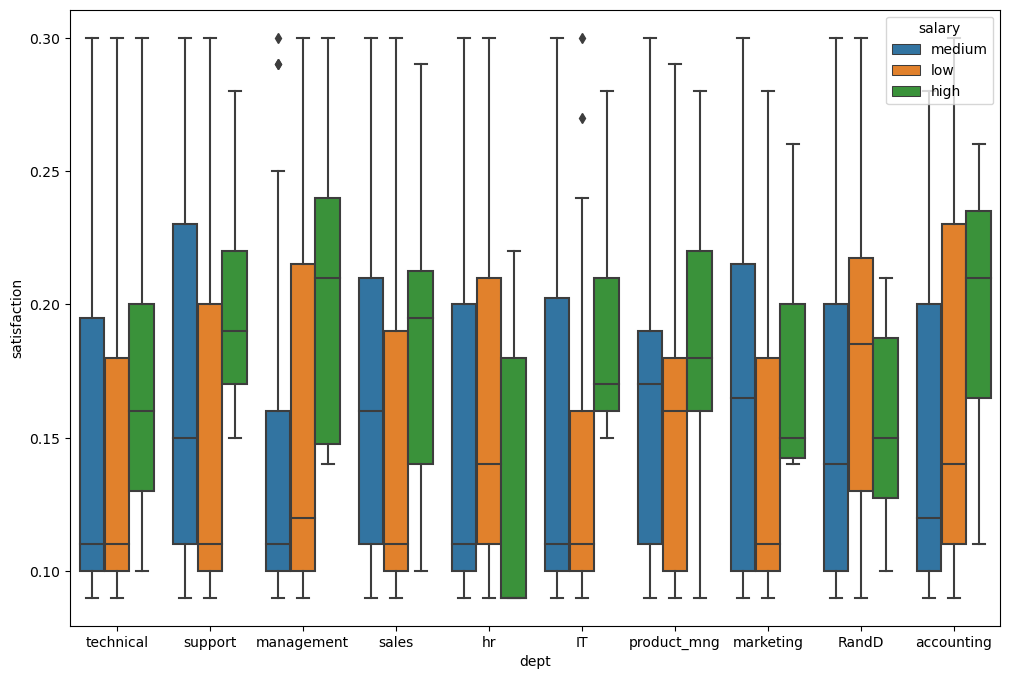

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'dept', y = 'satisfaction', hue='salary', data = satisfaction_level)

In [54]:
employees.head(2)

,satisfaction,evaluation,project,hours,tenure,accident,promotion,dept,salary,attrition
0,0.58,0.74,4,215,3,0,0,sales,low,0
1,0.82,0.67,2,202,3,0,0,sales,low,0


In [55]:
employees_enc = pd.get_dummies(employees, columns = ['dept', 'salary'], drop_first = True)

In [56]:
employees_enc.head(2)

,satisfaction,evaluation,project,hours,tenure,accident,promotion,attrition,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [57]:
x = employees_enc.drop('attrition', axis = 1)
y = employees_enc['attrition']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [59]:
models = []
results = []
names = []

scoring = 'roc_auc'

#Append algorithms and names to list
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC ()))

#iterate over algorithms
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle= True, random_state= 101) #create kfold
    cv_score = cross_val_score(model, x_train, y_train, scoring = scoring, cv = kfold) # get cross validation score with estimators
    results.append(cv_score) # append cv_score in empty list
    names.append(name) # append name in empty list

    print (f"{name}: {cv_score.mean()}, {cv_score.std()}") 


RF: 0.9918214211854733, 0.003928450855484328
GB: 0.8073995903515545, 0.010188706230236757
DT: 0.9745344288788191, 0.007563246109034636
LR: 0.814570411223316, 0.011368867088344082
SVM: 0.8125349322614115, 0.018767108194191702


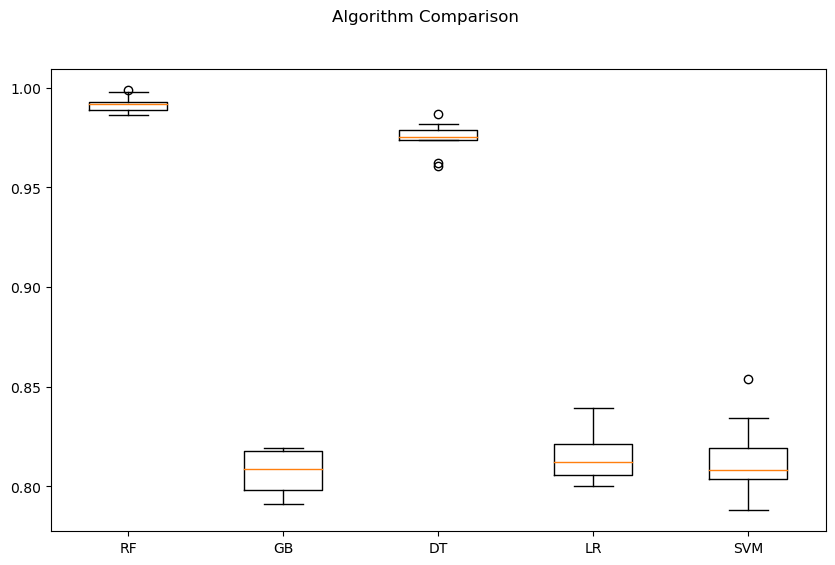

In [60]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [63]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [65]:
print('Random Forest Accuracy: {:.2f}'.format(accuracy_score(y_test, rf.predict(x_test))))

Random Forest Accuracy: 0.99


In [67]:
from sklearn import metrics

In [70]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3802
           1       1.00      0.96      0.98      1148

    accuracy                           0.99      4950
   macro avg       0.99      0.98      0.99      4950
weighted avg       0.99      0.99      0.99      4950



In [69]:
metrics.accuracy_score(y_test, y_pred)

0.9903030303030304

In [72]:
print(metrics.confusion_matrix(y_test, y_pred))

[[3797    5]
 [  43 1105]]


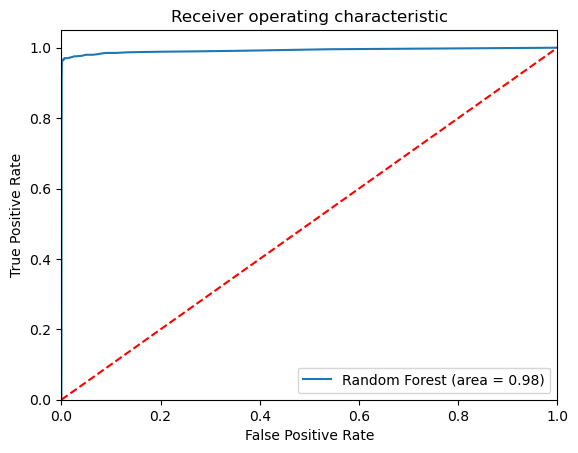

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The receiver operating characteristic (ROC) curve is a standard tool used with binary classifiers. The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
So, as we can see that the Random Forest Model has proven to be more useful in the prediction of employee turnover, now let’s have a look at the feature importance of our random forest classification model.

In [74]:
employees.columns

Index(['satisfaction', 'evaluation', 'project', 'hours', 'tenure', 'accident',
       'promotion', 'dept', 'salary', 'attrition'],
      dtype='object')

In [81]:
employees_enc.head(2)

,satisfaction,evaluation,project,hours,tenure,accident,promotion,attrition,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [84]:
feature_labels = np.array (['satisfaction', 'evaluation',	'project',	'hours',	'tenure', 'accident',	'promotion', 'attrition','dept_RandD',	
                            'dept_accounting','dept_hr',	'dept_management',	'dept_marketing',	'dept_product_mng','dept_sales','dept_support',	'dept_technical',	'salary_low','salary_medium'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

dept_marketing-0.10%
dept_management-0.12%
dept_accounting-0.15%
dept_RandD-0.17%
attrition-0.17%
dept_hr-0.18%
promotion-0.19%
dept_sales-0.31%
dept_product_mng-0.32%
dept_support-0.39%
salary_low-0.43%
dept_technical-0.74%
accident-1.07%
evaluation-13.66%
hours-14.21%
project-17.26%
tenure-18.79%
satisfaction-31.71%


# SUMMARY
1. Employees generally left when they are underworked or overworked
2. Employees with either really high or low evaluations should be taken into consideration for high turnover rate
3. Employees with low to medium salaries are the bulk of employee turnover
4. Employees that had 2,6, or 7 project count was at risk of leaving the company
5. Employee satisfaction is the highest indicator for employee turnover.
6. Employee that had 4 and 5 years at Company should be taken into consideration for high turnover rate
7. Employee satisfaction, years spent in the company, project, hours/month and evaluation were the five biggest factors in determining turnover.
8. Sales, technical, hr, and support departments had a high turnover rate.

#### Solution
1. Incentive budget to the highest probability instances.
2. Empower the team and do not micromanage
3. Express interest for team member success
4. Have clear vision / strategy for team
5. Help team with career development
